In [12]:
using ADAS, Plots
gr()
import Pkg; Pkg.add("PlotlyKaleido")
impurities = [:Kr, :W, :Ar, :Ne, :C]
Lz = [ADAS.get_cooling_rates(imp) for imp in impurities];
Rrad = [ADAS.get_radiation_rates(imp) for imp in impurities];
Zeff = [ADAS.get_Zeff(imp) for imp in impurities];
Zmean = Dict(imp => ADAS.get_Zmean(imp) for imp in impurities);
Rrec = Dict(imp => ADAS.get_recombination_rate(imp) for imp in impurities);
Riz = Dict(imp => ADAS.get_ionization_rate(imp) for imp in impurities)
# Zmean = Dict(Lz_.imp => [ADAS.get_Zmean(Lz_.imp)(ne_, Te_) for (Te_, ne_) in zip(Te, ne)] for Lz_ in Lz)


# plot(title="Average charge state ")
# for (k, v) in Zmean
#     plot!(r_omp, v, xlabel="r_omp [m]", label="$k")
# end

   Resolving package versions...
  No Changes to `~/development/StataMater/ADAS.jl/Project.toml`
  No Changes to `~/development/StataMater/ADAS.jl/Manifest.toml`


Dict{Symbol, ADAS.IonizationRate{ADAS.adf11File{ADAS.Ionization}, Interpolations.Extrapolation{Float64, 3, Interpolations.GriddedInterpolation{Float64, 3, Array{Float64, 3}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Flat{Nothing}}}} with 5 entries:
  :Ne => IonizationRate{adf11File{Ionization}, Extrapolation{Float64, 3, Gridde…
  :Ar => IonizationRate{adf11File{Ionization}, Extrapolation{Float64, 3, Gridde…
  :Kr => IonizationRate{adf11File{Ionization}, Extrapolation{Float64, 3, Gridde…
  :W  => IonizationRate{adf11File{Ionization}, Extrapolation{Float64, 3, Gridde…
  :C  => IonizationRate{adf11File{Ionization}, Extrapolation{Float64, 3, Gridde…

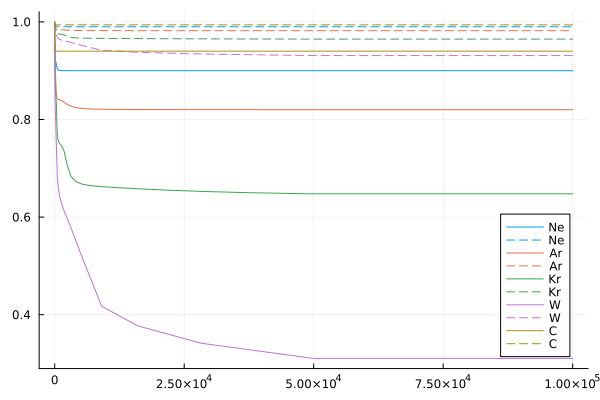

In [13]:
Te = 10 .^ LinRange(0.0,5.0,1000)
ne = 1e19 
plot()

for (i,(imp,Zm)) in enumerate(Zmean)
y =  1.0 .- Zm(ne, Te) .* 0.01
plot!(Te,y, label="$imp", linestyle=:solid, color=i)
    y = 1.0 .- Zm(ne, Te) .* 0.001
    plot!(Te, y, label="$imp", linestyle=:dash,color=i)
end
plot!()

In [14]:


size(Zmean[:Kr](ne, Te))

(1000,)

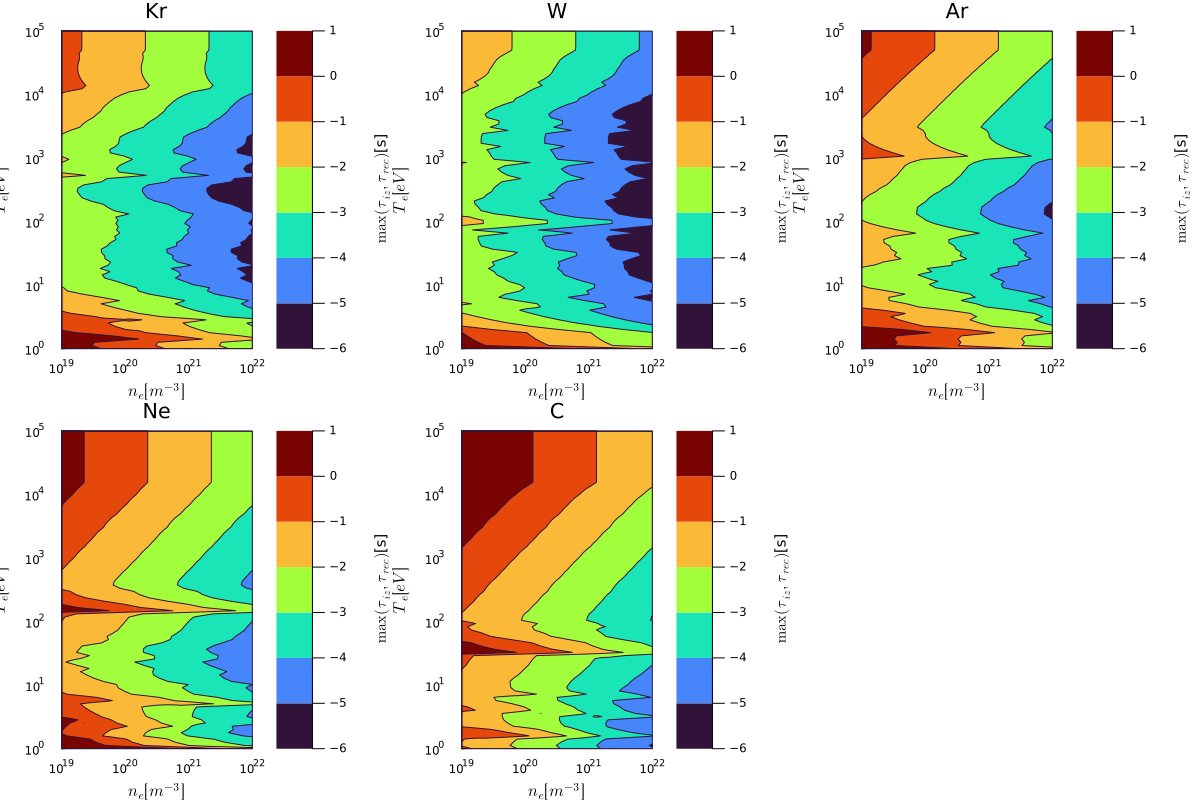

In [15]:
using Format
using LaTeXStrings
Te__ = 10 .^ LinRange(0.0, 5.0, 100)
ne__ = 10 .^ LinRange(19, 22, 100)
Te,ne = meshgrid(Te__,ne__)
#plot(layout=(length(Zmean),2))
τ_iz = Dict(imp => [1.0 / (Riz_.rate((Zmean[imp](ne_, Te_)), ne_, Te_) * ne_) for (Te_, ne_) in zip(Te, ne)] for ((imp, Riz_)) in Riz)
τ_rec = Dict(imp => [1.0 / (Rrec_.rate((Zmean[imp](ne_, Te_)), ne_, Te_) * ne_) for (Te_, ne_) in zip(Te, ne)] for ((imp, Rrec_)) in Rrec)
τ_max = Dict(imp => map(x->maximum(x),zip(τ_iz[imp], τ_rec[imp])) for imp in impurities)
plot(layout=(1,3),size=(1200,800))
contourf!(ne__, Te__, log10.(τ_rec[:Kr]), color=:turbo, clabels=true, cbar=true, subplot=1, xscale=:log10, yscale=:log10, clims=(-6, 0), aspect_ratio=:auto)
contourf!(ne__, Te__, log10.(τ_iz[:Kr]), color=:turbo, clabels=true, cbar=true, subplot=2,xscale=:log10,yscale=:log10,clims=(-6,0))
contourf!(ne__, Te__, (τ_iz[:Kr] ./ τ_rec[:Kr]), color=:turbo, clabels=true, cbar=true, subplot=3, xscale=:log10, yscale=:log10,clims=(0.9,1.1))
plot!()
plot(layout=5, size=(1200, 800))
colorbar_ticks = (collect(-6:1:1.0), format.("{:2.2e}",10 .^ collect(-6:1:1.0)))
for (i,imp) in enumerate(impurities)
    contourf!(ne__, Te__, log10.(τ_max[imp]), annot=1e-1, levels=collect(-6:1), color=:turbo, xlabel=L"$n_e [m^{-3}]$", ylabel=L"$T_e [eV]$", clabels=false, cbar=true, subplot=i, xscale=:log10, colorbar_ticks=colorbar_ticks, yscale=:log10, title="$imp", clim=(-6, 1.0), colorbar_title=L"$\max(\tau_{iz},\tau_{rec})$[s]",)
    plot!(grid=true, gridlinewidth=3,subplot=i)
end
plot!()

In [16]:

ν_iz

LoadError: UndefVarError: `ν_iz` not defined

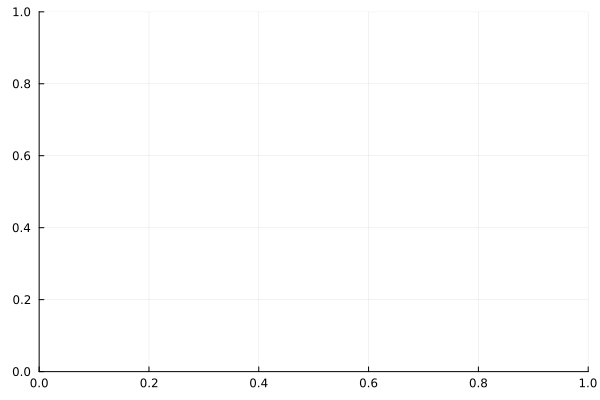

In [17]:
Te = 10 .^ LinRange(0.0, 5.0, 100)
ne = 10 .^ LinRange(1e19, 1e22, 100)
plot(layout=length(Zmean))
ν_iz = Dict(imp => [1.0 / (Riz_.rate(floor(Zmean[imp](ne_, Te_)), ne_, Te_) * ne_) for (Te_, ne_) in zip(Te, ne)] for ((imp,Riz_), (imp_,Zmean_)) in zip(Riz, Zmean))
ν_rec = Dict(imp => [1.0 / (Rrec_.rate(floor(Zmean[imp](ne_, Te_)), ne_, Te_) * ne_) for (Te_, ne_) in zip(Te, ne)] for ((imp, Rrec_), (imp_, Zmean_)) in zip(Rrec, Zmean))


for (i, (imp, Zm)) in enumerate(Zmean)
    y = 1.0 .- Zm(ne, Te) .* 0.01
    plot!(Te, y, label="$imp", linestyle=:solid, color=i)
    y = 1.0 .- Zm(ne, Te) .* 0.001
    plot!(Te, y, label="$imp", linestyle=:dash, color=i)
end
plot!()
plot()

